<i>Written by: Ahsan Khan, On behalf of Alberta Machine Intelligence Institute for the Al Pathways Partnership supported by Prairies Economic Development Canada</i>

# Lab 4: Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

# DT and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Helper Function

This will help you visualize the boundries of DT and Random Forest classifiers

In [ ]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y)

# Plot Decision Boundary function Referenced from: https://medium.com/analytics-vidhya/decision-boundary-for-classifiers-an-introduction-cc67c6d3da0e

### Reviewing Decision Trees and Observing Its Flaws

##### Here we are creating some dummy data to use for our example (``X`` and ``y``)

In [ ]:
#dummy data
np.random.seed(2345)

points_per_class = 150

mean = [0.5,0.5]
cov = [[2/5,1/3],[1/2,4/5]]
x_one = np.random.multivariate_normal(mean, cov, (points_per_class))
y_one = np.full((points_per_class),0)

mean = [-0.5,-0.5]
cov = [[2/5,1/3],[1/3,2/5]]
x_two = np.random.multivariate_normal(mean, cov, (points_per_class))
y_two = np.full((points_per_class),1)

X = np.concatenate((x_one,x_two),axis=0)
y = np.concatenate((y_one,y_two),axis=0)

<ipython-input-3-1517bf9bb3c5>:8: RuntimeWarning: covariance is not positive-semidefinite.
  x_one = np.random.multivariate_normal(mean, cov, (points_per_class))


#### Plotting a scatter plot of our data

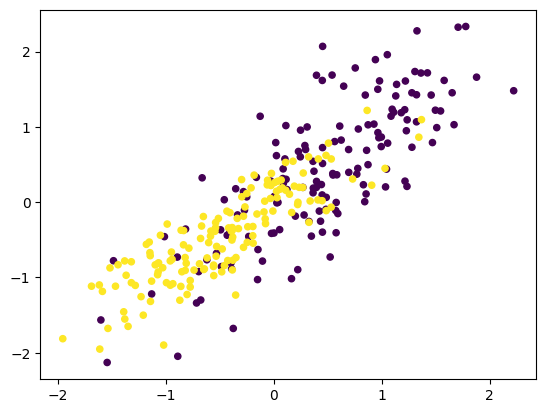

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, c=y)
plt.show()

#### Now we fit a DT classifier and observe the decision boundries made by our model.

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X, y)

score = DT_model.score(X,y)

Note how the plot_decision_boundary function is called as you will be using it later.

DT Accuracy Score:  100.0


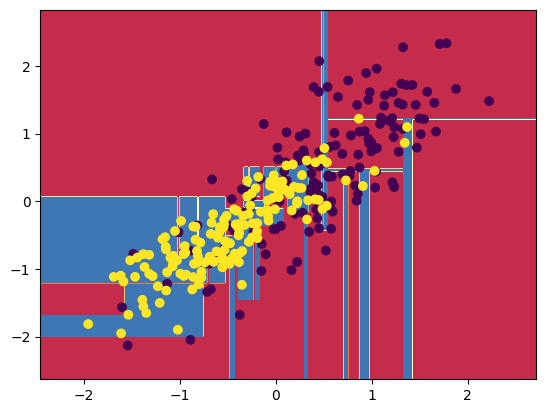

In [ ]:
plot_decision_boundary(DT_model, X, y)
print("DT Accuracy Score: ", score*100)

##### Observing the accuracy score we see the model clearly overfit (DT Flaw). Observing the decision boundaries you will notice there is no clear divison of boundaries for your data. Again, it is overfitting.

We will now fit another decision tree using data with the the same distribution (mean & covariance) as the data above. This data is slighty different but the statistics of it are very similar, if not the same.

##### Creating dummy data (``X_2`` and ``y_2``)

<ipython-input-7-cc605ca4e9d4>:7: RuntimeWarning: covariance is not positive-semidefinite.
  x_one_2 = np.random.multivariate_normal(mean, cov, (points_per_class))


DT Accuracy Score:  100.0


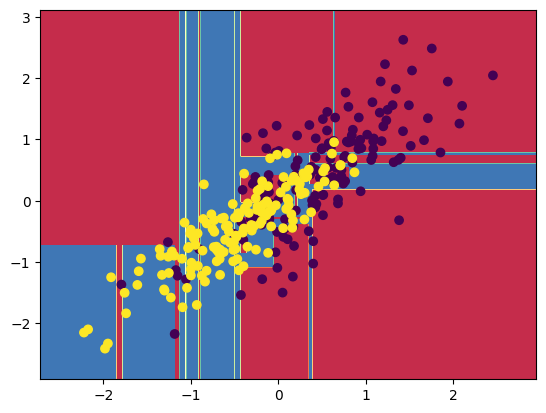

In [7]:
np.random.seed(80974)

points_per_class = 150

mean = [0.5,0.5]
cov = [[2/5,1/3],[1/2,4/5]]
x_one_2 = np.random.multivariate_normal(mean, cov, (points_per_class))
y_one_2 = np.full((points_per_class),0)

mean = [-0.5,-0.5]
cov = [[2/5,1/3],[1/3,2/5]]
x_two_2 = np.random.multivariate_normal(mean, cov, (points_per_class))
y_two_2 = np.full((points_per_class),1)

X_2 = np.concatenate((x_one_2,x_two_2),axis=0)
y_2 = np.concatenate((y_one_2,y_two_2),axis=0)

DT_model_2 = DecisionTreeClassifier()
DT_model_2.fit(X_2, y_2)

score = DT_model_2.score(X_2,y_2)

plot_decision_boundary(DT_model_2, X_2, y_2)
print("DT Accuracy Score: ", score*100)

##### You will notice that there are different boundaries for our data this time around as compared to the model fit before this. The decision boundries are quite different even though the data is not significantly different. This inability to generalize a model on similar data is what gives rise to the random forest algorithm; Where the average fit of several trees is taken in order to minimize the sensitivity of minor changes in the data.

# Lab Activity One: The Random Forest

You will now build a random forest classifer using a total of 60 decision trees together and taking the average of their fit.

> [A0] indicates an activity to be answered.

##### [A1] Instantiate a ``RandomForestClassifer``. The ``n_estimator`` defines how many trees to use. Use 60 trees.

In [11]:
 # Instantiate a RandomForest classifier and setting the number of the tree made to 60
Random_Forest_model=RandomForestClassifier(n_estimators=60)

RandomForestClassifier(n_estimators=60)

##### [A2] Recall that we built dummy data in our first examples above. Use the data ``X`` and ``y`` as your inputs (same as the first example above) to fit onto your random forest model.

In [12]:
#fit a RandomForest classifier
Random_Forest_model.fit(X,y)

RandomForestClassifier(n_estimators=60)

In [26]:
#getting the accuracy for our RandomForest model
Random_Forest_model.score(X,y)*100

99.66666666666667

##### [A3] Plot the decision boundaries of the random forest model using the helper function defined above.

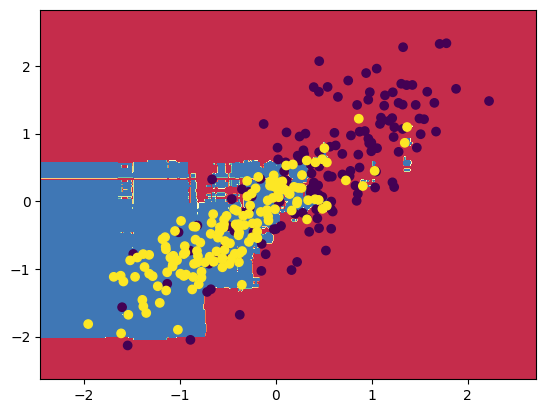

In [13]:
#observe the decision boundries made by our model
plot_decision_boundary(Random_Forest_model, X, y)

##### [A4] Fit *another* random forest classifer. This time use the ``X_2`` and ``y_2`` data (from second example), with 60 trees. Plot and observe the boundaries.

In [25]:
# Instantiate a RandomForest classifier this time we will use different dataset
#fit a RandomForest classifier
Random_Forest_2=RandomForestClassifier(n_estimators=60)
Random_Forest_2.fit(X_2,y_2)


RandomForestClassifier(n_estimators=60)

In [28]:
#Observing the accuracy score
Random_Forest_2.score(X_2,y_2)*100

100.0

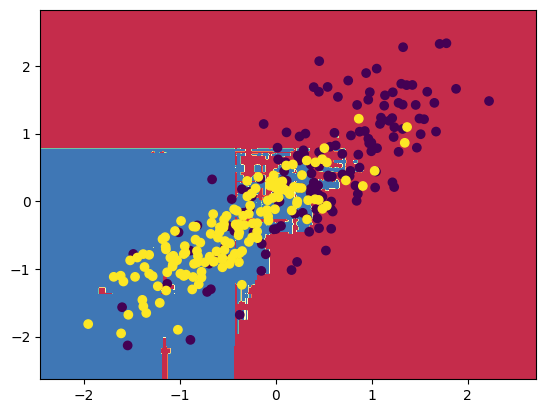

In [18]:
#observe the decision boundries made by our model
plot_decision_boundary(Random_Forest_2, X, y)

When observing the two graphs you just plotted you will see the decision boundaries set by random forest models are not significantly impacted by slight changes in the data as compared to the boundaries set in the decision trees above. Recall you used X and y for your first model and X_2 and y_2 in your second model. It takes an average of the set number of trees and fits data in a way which minimizes overfitting and enhances generalization.

# Lab Activity Two: DT and Random Forest on the Iris dataset

For this activity you will be working on the iris dataset. The data contains 3 classes of 50 instances each, where each class refers to a type of iris plant and 4 feature attributes determining the type of class.

In [29]:
#Data Prepping

from sklearn.datasets import load_iris

X, y = load_iris( return_X_y = True)

df = pd.DataFrame(X)
df['Class'] = y

#How the data looks like
df.head(7)

,0,1,2,3,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0


##### [A5] Split, instantiate, fit a decision tree model, predict on your test set and evaluate your model.

In [56]:
#spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### [A6] Instantiate, fit a random forest model, predict on your test set and evaluate your model. (Use the ``X_train`` and ``y_train`` in the you used in your DT model right above)

In [43]:
 # Instantiate a decision tree classifier
DTree_new=DecisionTreeClassifier()

In [44]:
#fit a decision tree classifier
DTree_new.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
#predicting on the  testing dataset
y_pred=DTree_new.predict(X_test)

In [69]:
#Observing the accuracy score
accuracy_score(y_test,y_pred)*100

96.66666666666667

In [70]:
# Instantiate a RandomForest classifier
#fit a RandomForest classifier
Random_Forest_new=RandomForestClassifier()
Random_Forest_new.fit(X_train,y_train)


RandomForestClassifier()

In [71]:
#predicting on the  testing dataset
y_pred=Random_Forest_new.predict(X_test)

In [72]:
#Observing the accuracy score
accuracy_score(y_test,y_pred)*100

96.66666666666667

##### [A7] Given by the accuracy scores in your DT and RF models above, discuss whether this truly represents the performance of the model. What else besides a score do we need to keep track of when evaluating a model? How can we fix these issues?